<a href="https://colab.research.google.com/github/twinwood/Stock-Predict---Big-Data/blob/master/Stock_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Long short term memory
#predict closing stock price (example apple inc), via 60 stock price
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
print("All libraries imported")

All libraries imported


In [ ]:
#df=data frame
df = web.DataReader('SUPM.KL',data_source='yahoo', start='2012-01-01',end='2020-8-10')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,0.977460,0.952840,0.952840,0.975000,14064295.0,0.720956
2012-01-04,0.987310,0.950380,0.982390,0.950380,7494757.0,0.702751
2012-01-05,0.970080,0.960230,0.960230,0.962690,3129415.0,0.711854
2012-01-06,0.972540,0.960230,0.962690,0.962690,4949797.0,0.711854
2012-01-09,0.975000,0.962690,0.962690,0.970080,3442560.0,0.717318
...,...,...,...,...,...,...
2020-08-05,23.660000,21.799999,22.400000,23.000000,31750500.0,23.000000
2020-08-06,23.820000,22.780001,23.219999,23.780001,18939400.0,23.780001
2020-08-07,24.440001,22.500000,24.059999,22.920000,31712100.0,22.920000


In [ ]:
df.shape

(2124, 6)

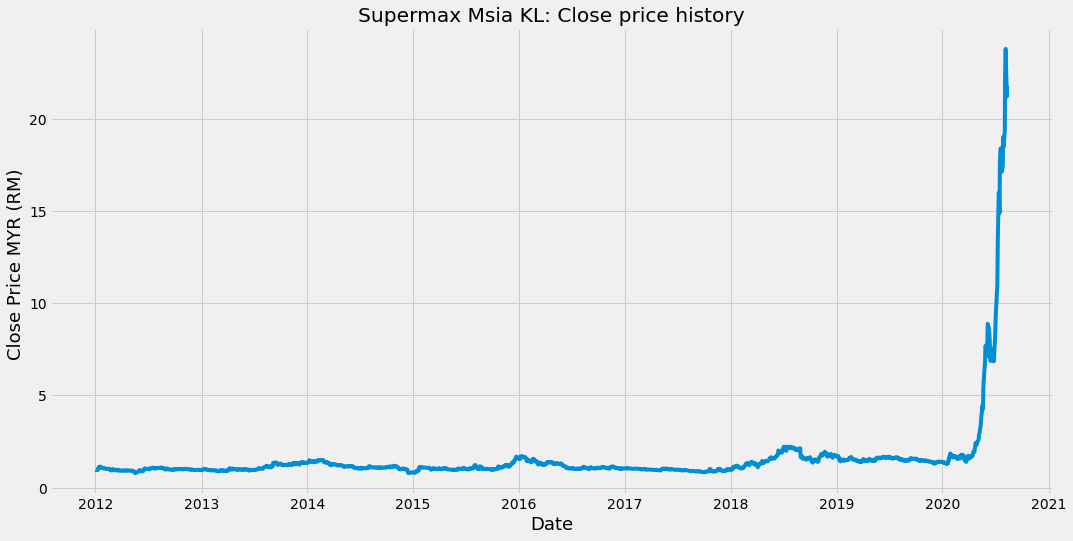

In [ ]:
#visualise the closing price history
plt.figure(figsize=(16,8))
plt.title('Supermax Msia KL: Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price MYR (RM) ',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len


712

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.79968187e-03],
       [8.79968187e-03],
       [9.22900486e-03],
       [9.65833304e-03],
       [9.65833304e-03],
       [8.79968187e-03],
       [9.22900486e-03],
       [9.44388718e-03],
       [9.87277890e-03],
       [9.65833304e-03],
       [9.01455900e-03],
       [9.01455900e-03],
       [9.01455900e-03],
       [9.01455900e-03],
       [8.79968187e-03],
       [8.58523601e-03],
       [8.58523601e-03],
       [8.37079015e-03],
       [8.15590784e-03],
       [8.15590784e-03],
       [8.37079015e-03],
       [8.79968187e-03],
       [8.79968187e-03],
       [8.15590784e-03],
       [8.15590784e-03],
       [7.94146197e-03],
       [8.37079015e-03],
       [8.58523601e-03],
       [8.37079015e-03],
       [8.15590784e-03],
       [8.15590784e-03],
       [7.94146197e-03],
       [7.94146197e-03],
       [7.94146197e-03],
       [7.94146197e-03],
       [7.51213380e-03],
       [7.72657966e-03],
       [6.65356837e-03],
       [6.65356837e-03],
       [6.65356837e-03],


In [ ]:
#create training data set
train_data =scaled_data[0:training_data_len ,:]
#split the data
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
      print(x_train)
      print(y_train)
      print()


[array([0.00879968, 0.00879968, 0.009229  , 0.00965833, 0.00965833,
       0.00879968, 0.009229  , 0.00944389, 0.00987278, 0.00965833,
       0.00901456, 0.00901456, 0.00901456, 0.00901456, 0.00879968,
       0.00858524, 0.00858524, 0.00837079, 0.00815591, 0.00815591,
       0.00837079, 0.00879968, 0.00879968, 0.00815591, 0.00815591,
       0.00794146, 0.00837079, 0.00858524, 0.00837079, 0.00815591,
       0.00815591, 0.00794146, 0.00794146, 0.00794146, 0.00794146,
       0.00751213, 0.00772658, 0.00665357, 0.00665357, 0.00665357,
       0.00708281, 0.00729725, 0.00772658, 0.00772658, 0.00794146,
       0.00751213, 0.00686819, 0.00665357, 0.00643895, 0.00600966,
       0.00665357, 0.00665357, 0.00643895, 0.00665357, 0.00665357,
       0.00643895, 0.00622428, 0.00622428, 0.00622428, 0.00600966])]
[0.006009664430443845]

[array([0.00879968, 0.00879968, 0.009229  , 0.00965833, 0.00965833,
       0.00879968, 0.009229  , 0.00944389, 0.00987278, 0.00965833,
       0.00901456, 0.00901456, 0.0

In [ ]:
#convert train data to numpy arrays
x_train,y_train= np.array(x_train), np.array(y_train)
#Reshape train data
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(652, 60, 1)

In [ ]:
#build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1))) #50 layers, True because we want to use again the LSTM
model.add(LSTM(50,return_sequences=False)) #False because no need to use LSTM layers after this
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile a model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the mode
model.fit(x_train,y_train, batch_size=1, epochs=1)

652/652 [==============================] - 13s 20ms/step - loss: 5.0604e-05


In [ ]:
#create test data set
#new array contain scaled values from index
test_data=scaled_data[training_data_len -60:, :]
#create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  #y_test.append(test_data[])

In [ ]:
#convert data to numpy array
x_test= np.array(x_test)
#reshape to 3 dimensional as LSTM model is expecting 3D
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions) #need to unscale the predictions data value so it will not be 0 to 1

In [ ]:
#To evaluate the model, get root mean squared error (RMSE), the lower RMSE indicate a better fit
#rmse=np.sqrt(np.mean((predictions-y_test)**2))
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse


0.9620063934433326

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


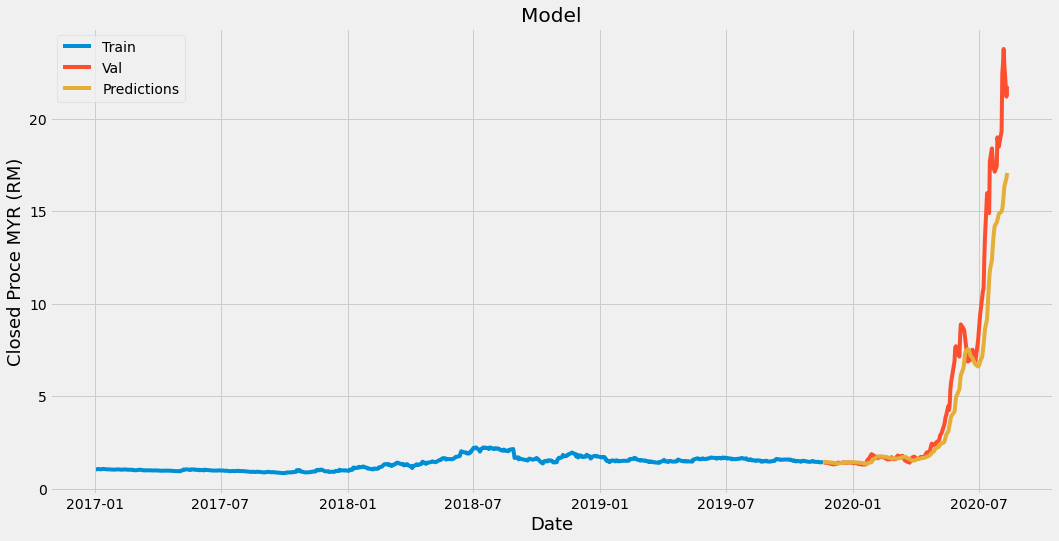

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closed Proce MYR (RM)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='upper left')
plt.show()

In [ ]:
#show valid and predicted price
valid

,Close,Predictions
Date,,
2019-11-20,1.418180,1.450308
2019-11-21,1.408330,1.446784
2019-11-22,1.398480,1.443030
2019-11-25,1.398480,1.438714
2019-11-26,1.378790,1.434353
...,...,...
2020-08-05,23.000000,15.444943
2020-08-06,23.780001,15.862675
2020-08-07,22.920000,16.349548


In [ ]:
#Get the quote 
supermx_quote = web.DataReader('SUPM.KL',data_source='yahoo', start='2012-01-01',end='2020-8-10')
#new dataframe
new_df=supermx_quote.filter(['Close'])
#filter last 60 days value and convert to array
last_60_days = new_df[-60:].values #the last 60 values
#scale it to 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert X_test date to numpy array
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get predicted price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[17.25923]]


In [ ]:
#Get the quote 
supermx_quote2 = web.DataReader('SUPM.KL',data_source='yahoo', start='2020-8-11',end='2020-8-11')
print(supermx_quote2['Close'])


Date
2020-08-11    21.66
Name: Close, dtype: float64
